In [20]:
# os.system("ln -s data/* ~/work/mpii/data/")

0

In [2]:
# !sudo apt install unzip # unzip 이 없는 경우
# !mkdir -p ~/work/mpii
# !cd ~/work/mpii

# !wget https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1.tar.gz -P ~/work/mpii
# !wget https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1_u12_2.zip -P ~/work/mpii
# !tar -xf ~/work/mpii/mpii_human_pose_v1.tar.gz -C ~/work/mpii
# !unzip -q ~/work/mpii/mpii_human_pose_v1_u12_2.zip -d ~/work/mpii

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-28ubuntu4.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
--2025-09-16 07:49:26--  https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1.tar.gz
Resolving datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)... 139.19.206.177
Connecting to datasets.d2.mpi-inf.mpg.de (datasets.d2.mpi-inf.mpg.de)|139.19.206.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12088943206 (11G) [application/x-gzip]
Saving to: ‘/home/jovyan/work/mpii/mpii_human_pose_v1.tar.gz’

mpii_human_pose_v1. 100%[===================>]  11.26G  14.7MB/s    in 24m 54s 

2025-09-16 08:14:21 (7.72 MB/s) - ‘/home/jovyan/work/mpii/mpii_human_pose_v1.tar.gz’ saved [12088943206/12088943206]

--2025-09-16 08:14:21--  https://datasets.d2.mpi-inf.mpg.de/andriluka14cvpr/mpii_human_pose_v1_u12_2.zip
Resolving datasets.d2.mpi-inf.mpg.

In [4]:
! pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 78.2 MB/s eta 0:00:00:00:0100:01


In [31]:
# !cd ~/work/mpii/mpii_human_pose_v1_u12_2
# !wget https://d3s0tskafalll9.cloudfront.net/media/documents/train.json
# !wget https://d3s0tskafalll9.cloudfront.net/media/documents/validation.json
# !mv train.json ~/work/mpii/mpii_human_pose_v1_u12_2/
# !mv validation.json ~/work/mpii/mpii_human_pose_v1_u12_2/

--2025-09-16 09:28:59--  https://d3s0tskafalll9.cloudfront.net/media/documents/train.json
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 108.158.213.87, 108.158.213.104, 108.158.213.49, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|108.158.213.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31043010 (30M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  29.60M  18.9MB/s    in 1.6s    

2025-09-16 09:29:02 (18.9 MB/s) - ‘train.json’ saved [31043010/31043010]

--2025-09-16 09:29:02--  https://d3s0tskafalll9.cloudfront.net/media/documents/validation.json
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 108.158.213.87, 108.158.213.104, 108.158.213.49, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|108.158.213.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4127396 (3.9M) 

In [27]:
# !tar -xf ~/work/mpii/mpii_human_pose_v1.tar.gz -C ~/work/mpii

In [41]:
# 주의! ray를 pytorch보다 먼저 import하면 오류가 발생할 수 있습니다
import io, json, os, math

import torch
import torch.nn as nn
import torch.nn.functional as F

import ray

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 프로젝트 경로 설정
PROJECT_PATH = os.path.join(os.getenv("HOME"), 'work/mpii')
IMAGE_PATH = os.path.join(PROJECT_PATH, 'images')
MODEL_PATH = os.path.join(PROJECT_PATH, 'models')
PT_RECORD_PATH = os.path.join(PROJECT_PATH, 'ptrecords_mpii')
TRAIN_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'train.json')
VALID_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'validation.json')

print('슝=3')

슝=3


In [42]:
with open(TRAIN_JSON) as train_json:
    train_annos = json.load(train_json)
    json_formatted_str = json.dumps(train_annos[0], indent=2)
    print(json_formatted_str)

{
  "joints_vis": [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1
  ],
  "joints": [
    [
      620.0,
      394.0
    ],
    [
      616.0,
      269.0
    ],
    [
      573.0,
      185.0
    ],
    [
      647.0,
      188.0
    ],
    [
      661.0,
      221.0
    ],
    [
      656.0,
      231.0
    ],
    [
      610.0,
      187.0
    ],
    [
      647.0,
      176.0
    ],
    [
      637.0201,
      189.8183
    ],
    [
      695.9799,
      108.1817
    ],
    [
      606.0,
      217.0
    ],
    [
      553.0,
      161.0
    ],
    [
      601.0,
      167.0
    ],
    [
      692.0,
      185.0
    ],
    [
      693.0,
      240.0
    ],
    [
      688.0,
      313.0
    ]
  ],
  "image": "015601864.jpg",
  "scale": 3.021046,
  "center": [
    594.0,
    257.0
  ]
}


In [43]:
def parse_one_annotation(anno, image_dir):
    filename = anno['image']
    joints = anno['joints']
    joints_visibility = anno['joints_vis']
    annotation = {
        'filename': filename,
        'filepath': os.path.join(image_dir, filename),
        'joints_visibility': joints_visibility,
        'joints': joints,
        'center': anno['center'],
        'scale' : anno['scale']
    }
    return annotation

print('슝=3')

슝=3


In [44]:
with open(TRAIN_JSON) as train_json:
    train_annos = json.load(train_json)
    test = parse_one_annotation(train_annos[0], IMAGE_PATH)
    print(test)

{'filename': '015601864.jpg', 'filepath': '/home/jovyan/work/mpii/images/015601864.jpg', 'joints_visibility': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[620.0, 394.0], [616.0, 269.0], [573.0, 185.0], [647.0, 188.0], [661.0, 221.0], [656.0, 231.0], [610.0, 187.0], [647.0, 176.0], [637.0201, 189.8183], [695.9799, 108.1817], [606.0, 217.0], [553.0, 161.0], [601.0, 167.0], [692.0, 185.0], [693.0, 240.0], [688.0, 313.0]], 'center': [594.0, 257.0], 'scale': 3.021046}


In [45]:
def generate_ptexample(anno):
    filename = anno['filename']
    filepath = anno['filepath']

    # 이미지 파일 읽기
    with open(filepath, 'rb') as image_file:
        content = image_file.read()

    image = Image.open(filepath)
    # JPEG 형식 및 RGB 모드가 아니면 변환
    if image.format != 'JPEG' or image.mode != 'RGB':
        image_rgb = image.convert('RGB')
        with io.BytesIO() as output:
            image_rgb.save(output, format="JPEG", quality=95)
            content = output.getvalue()

    width, height = image.size
    depth = 3

    c_x = int(anno['center'][0])
    c_y = int(anno['center'][1])
    scale = anno['scale']

    x = [int(joint[0]) if joint[0] >= 0 else int(joint[0])
         for joint in anno['joints']]
    y = [int(joint[1]) if joint[1] >= 0 else int(joint[0])
         for joint in anno['joints']]

    v = [0 if joint_v == 0 else 2 for joint_v in anno['joints_visibility']]

    feature = {
        'image/height': height,
        'image/width': width,
        'image/depth': depth,
        'image/object/parts/x': x,
        'image/object/parts/y': y,
        'image/object/center/x': c_x,
        'image/object/center/y': c_y,
        'image/object/scale': scale,
        'image/object/parts/v': v,
        'image/encoded': content,
        'image/filename': filename.encode()  # bytes로 저장
    }

    return feature

print('슝=3')

슝=3


In [46]:
def chunkify(l, n):
    size = len(l) // n
    start = 0
    results = []
    for i in range(n):
        results.append(l[start:start + size])
        start += size
    return results

print('슝=3')

슝=3


In [47]:
test_chunks = chunkify([0] * 1000, 64)
print(test_chunks)
print(len(test_chunks))
print(len(test_chunks[0]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0,

In [48]:
import pickle

@ray.remote
def build_single_ptrecord(chunk, path):
    print('start to build ptrecord for ' + path)

    with open(path, 'wb') as writer:
        for anno in chunk:
            ptexample = generate_ptexample(anno)
            pickle.dump(ptexample, writer)

    print('finished building ptrecord for ' + path)

print('슝=3')

슝=3


In [49]:
def build_pt_records(annotations, total_shards, split):
    chunks = chunkify(annotations, total_shards)
    futures = [
        build_single_ptrecord.remote(
            chunk, '{}/{}_{}_of_{}.ptrecords'.format(
                PT_RECORD_PATH,
                split,
                str(i + 1).zfill(4),
                str(total_shards).zfill(4),
            )
        ) for i, chunk in enumerate(chunks)
    ]
    ray.get(futures)

print('슝=3')

슝=3


In [50]:
from torch.utils.data import Dataset

class MPIIDataset(Dataset):
    def __init__(self, annotation_file, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform

        # JSON 파일을 읽어 annotations 리스트 생성
        with open(annotation_file, 'r') as f:
            annotations = json.load(f)

        # 각 annotation을 파싱하여 리스트에 저장
        self.annotations = [parse_one_annotation(anno, image_dir) for anno in annotations]

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        anno = self.annotations[idx]
        # 이미지 파일 경로로부터 이미지를 로드 (RGB 모드로 변환)
        image = Image.open(anno['filepath']).convert('RGB')

        # transform이 있으면 적용
        if self.transform:
            image, heatmaps = self.transform({'image': image, 'annotation': anno})
            return image, heatmaps
        else:
            # transform이 없으면 원본 이미지와 annotation dict 반환
            return image, anno

In [12]:
# 경로가 자동생성되지 않는다면 아래 코드를 실행해주세요.
# os.makedirs(os.path.join(PT_RECORD_PATH, 'train'), exist_ok=True)
# os.makedirs(os.path.join(PT_RECORD_PATH, 'val'), exist_ok=True)

In [51]:
%%time
num_train_shards = 64
num_val_shards = 8

ray.init()

print('Start to parse annotations.')
if not os.path.exists(PT_RECORD_PATH):
    os.makedirs(PT_RECORD_PATH)

with open(TRAIN_JSON) as train_json:
    train_annos = json.load(train_json)
    train_annotations = [
        parse_one_annotation(anno, IMAGE_PATH)
        for anno in train_annos
    ]
    print('First train annotation: ', train_annotations[0])

with open(VALID_JSON) as val_json:
    val_annos = json.load(val_json)
    val_annotations = [
        parse_one_annotation(anno, IMAGE_PATH)
        for anno in val_annos
    ]
    print('First val annotation: ', val_annotations[0])

print('Start to build PT Records.')
build_pt_records(train_annotations, num_train_shards, 'train')
build_pt_records(val_annotations, num_val_shards, 'val')

print('Successfully wrote {} annotations to PT Records.'.format(
    len(train_annotations) + len(val_annotations)))

2025-09-17 14:46:33,972	WARNING services.py:2148 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67104768 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=4.48gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2025-09-17 14:46:35,155	INFO worker.py:1951 -- Started a local Ray instance.


Start to parse annotations.
First train annotation:  {'filename': '015601864.jpg', 'filepath': '/home/jovyan/work/mpii/images/015601864.jpg', 'joints_visibility': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[620.0, 394.0], [616.0, 269.0], [573.0, 185.0], [647.0, 188.0], [661.0, 221.0], [656.0, 231.0], [610.0, 187.0], [647.0, 176.0], [637.0201, 189.8183], [695.9799, 108.1817], [606.0, 217.0], [553.0, 161.0], [601.0, 167.0], [692.0, 185.0], [693.0, 240.0], [688.0, 313.0]], 'center': [594.0, 257.0], 'scale': 3.021046}
First val annotation:  {'filename': '005808361.jpg', 'filepath': '/home/jovyan/work/mpii/images/005808361.jpg', 'joints_visibility': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'joints': [[804.0, 711.0], [816.0, 510.0], [908.0, 438.0], [1040.0, 454.0], [906.0, 528.0], [883.0, 707.0], [974.0, 446.0], [985.0, 253.0], [982.7591, 235.9694], [962.2409, 80.0306], [869.0, 214.0], [798.0, 340.0], [902.0, 253.0], [1067.0, 253.0], [1167.0, 353.0], [1142.0, 478.0

In [56]:
!pip install tfrecord

In [57]:
from tfrecord.torch.dataset import TFRecordDataset

feature_description = {
    'image/height': 'int',
    'image/width': 'int',
    'image/depth': 'int',
    'image/object/parts/x': 'int',
    'image/object/parts/y': 'int',
    'image/object/parts/v': 'int',
    'image/object/center/x': 'int',
    'image/object/center/y': 'int',
    'image/object/scale': 'float',
    'image/encoded': 'byte',
    'image/filename': 'byte',
}

print('슝=3')

TypeError: Couldn't build proto file into descriptor pool: duplicate symbol 'tensorflow.BytesList'

In [58]:
import torch

def crop_roi(image, features, margin=0.2):
    img_height, img_width, img_depth = image.shape

    keypoint_x = torch.tensor(features['image/object/parts/x'], dtype=torch.int32)
    keypoint_y = torch.tensor(features['image/object/parts/y'], dtype=torch.int32)
    center_x = features['image/object/center/x']
    center_y = features['image/object/center/y']
    body_height = features['image/object/scale'] * 200.0

    # 유효한 keypoint (값이 0보다 큰 값)만 선택합니다.
    masked_keypoint_x = keypoint_x[keypoint_x > 0]
    masked_keypoint_y = keypoint_y[keypoint_y > 0]

    # 최소, 최대 값 계산 (유효한 keypoint가 하나 이상 있다고 가정)
    keypoint_xmin = masked_keypoint_x.min()
    keypoint_xmax = masked_keypoint_x.max()
    keypoint_ymin = masked_keypoint_y.min()
    keypoint_ymax = masked_keypoint_y.max()

    # margin을 적용하여 경계를 확장 (body_height * margin 값을 정수로 캐스팅)
    extra = int(body_height * margin)
    xmin = int(keypoint_xmin.item()) - extra
    xmax = int(keypoint_xmax.item()) + extra
    ymin = int(keypoint_ymin.item()) - extra
    ymax = int(keypoint_ymax.item()) + extra

    # 이미지 경계를 벗어나지 않도록 조정
    effective_xmin = xmin if xmin > 0 else 0
    effective_ymin = ymin if ymin > 0 else 0
    effective_xmax = xmax if xmax < img_width else img_width
    effective_ymax = ymax if ymax < img_height else img_height

    # 이미지 크기 재조정
    cropped_image = image[effective_ymin:effective_ymax, effective_xmin:effective_xmax, :]
    new_height, new_width, _ = cropped_image.shape

    # keypoint 좌표를 정규화 (0~1 범위)
    effective_keypoint_x = (keypoint_x.float() - effective_xmin) / new_width
    effective_keypoint_y = (keypoint_y.float() - effective_ymin) / new_height

    return cropped_image, effective_keypoint_x, effective_keypoint_y

print('슝=3')

슝=3


In [59]:
import torch

def generate_2d_gaussian(height, width, y0, x0, visibility=2, sigma=1, scale=12):
    # (height, width) 크기의 0으로 채워진 heatmap 생성
    heatmap = torch.zeros((height, width), dtype=torch.float32)

    xmin = x0 - 3 * sigma
    ymin = y0 - 3 * sigma
    xmax = x0 + 3 * sigma
    ymax = y0 + 3 * sigma

    # 범위가 이미지 내에 없거나, visibility가 0이면 heatmap 그대로 반환
    if xmin >= width or ymin >= height or xmax < 0 or ymax < 0 or visibility == 0:
        return heatmap

    size = int(6 * sigma + 1)
    grid_range = torch.arange(0, size, dtype=torch.float32)
    x_grid, y_grid = torch.meshgrid(grid_range, grid_range, indexing='xy')
    center_x = size // 2
    center_y = size // 2

    # 가우시안 patch 계산
    gaussian_patch = torch.exp(-(((x_grid - center_x)**2 + (y_grid - center_y)**2) / (sigma**2 * 2))) * scale

    # 이미지와 patch 간의 겹치는 영역 계산
    patch_xmin = max(0, -xmin)
    patch_ymin = max(0, -ymin)
    patch_xmax = min(xmax, width) - xmin
    patch_ymax = min(ymax, height) - ymin

    heatmap_xmin = max(0, xmin)
    heatmap_ymin = max(0, ymin)
    heatmap_xmax = min(xmax, width)
    heatmap_ymax = min(ymax, height)

    # 계산된 영역에 gaussian_patch 값을 할당
    heatmap[heatmap_ymin:heatmap_ymax, heatmap_xmin:heatmap_xmax] = \
        gaussian_patch[int(patch_ymin):int(patch_ymax), int(patch_xmin):int(patch_xmax)]

    return heatmap

def make_heatmaps(features, keypoint_x, keypoint_y, heatmap_shape):
    v = torch.tensor(features['image/object/parts/v'], dtype=torch.float32)
    x = torch.round(torch.tensor(keypoint_x, dtype=torch.float32) * heatmap_shape[0]).to(torch.int32)
    y = torch.round(torch.tensor(keypoint_y, dtype=torch.float32) * heatmap_shape[1]).to(torch.int32)

    num_heatmap = heatmap_shape[2]
    heatmaps_list = []
    for i in range(num_heatmap):
        # generate_2d_gaussian 함수 호출 시, height=heatmap_shape[1], width=heatmap_shape[0]
        gaussian = generate_2d_gaussian(
            heatmap_shape[1],
            heatmap_shape[0],
            int(y[i].item()),
            int(x[i].item()),
            visibility=int(v[i].item())
        )
        heatmaps_list.append(gaussian)

    # (num_heatmap, height, width) 텐서를 생성한 후, (height, width, num_heatmap)로 전치
    heatmaps = torch.stack(heatmaps_list, dim=0)
    heatmaps = heatmaps.permute(1, 2, 0)

    return heatmaps

print('슝=3')

슝=3


In [60]:
import torch
from PIL import Image
import io
import numpy as np

class Preprocessor(object):
    def __init__(self,
                 image_shape=(256, 256, 3),
                 heatmap_shape=(64, 64, 16),
                 is_train=False):
        self.is_train = is_train
        self.image_shape = image_shape      # (height, width, channels)
        self.heatmap_shape = heatmap_shape  # (height, width, num_heatmap)

    def __call__(self, example):
        features = self.parse_tfexample(example)
        # image 데이터를 다시 bytes로 디코딩 후 재로딩 (JPEG 형식)
        image = Image.open(io.BytesIO(features['image/encoded']))

        if self.is_train:
            # 0.1 ~ 0.3 사이의 random margin 생성
            random_margin = torch.empty(1).uniform_(0.1, 0.3).item()
            image, keypoint_x, keypoint_y = self.crop_roi(image, features, margin=random_margin)
            image = image.resize((self.image_shape[1], self.image_shape[0]))
        else:
            image, keypoint_x, keypoint_y = self.crop_roi(image, features)
            image = image.resize((self.image_shape[1], self.image_shape[0]))

        # 이미지 정규화: uint8 → [0,255] → [-1, 1]
        image_np = np.array(image).astype(np.float32)
        image_np = image_np / 127.5 - 1.0
        # 채널 우선순서로 변환: (H, W, C) -> (C, H, W)
        image_tensor = torch.from_numpy(image_np).permute(2, 0, 1)

        heatmaps = self.make_heatmaps(features, keypoint_x, keypoint_y, self.heatmap_shape)

        return image_tensor, heatmaps

    def parse_tfexample(self, example):
        """
        MPIIDataset에서 전달한 예제를 받아, Preprocessor가 처리할 수 있도록 features dict를 구성합니다.
        예제 형식: {'image': PIL.Image, 'annotation': anno}
        """
        annotation = example['annotation']
        # joints: list of [x, y]
        joints = annotation['joints']
        keypoint_x = [joint[0] for joint in joints]
        keypoint_y = [joint[1] for joint in joints]

        # joints_vis가 없으면 모든 관절이 가시적이라고 가정 (1)
        joints_vis = annotation.get('joints_vis', [1] * len(joints))

        features = {
            'image/encoded': self.image_to_bytes(example['image']),
            'image/object/parts/x': keypoint_x,
            'image/object/parts/y': keypoint_y,
            'image/object/parts/v': joints_vis,
            'image/object/center/x': annotation['center'][0],
            'image/object/center/y': annotation['center'][1],
            'image/object/scale': annotation['scale'],
        }
        return features

    def image_to_bytes(self, image):
        """
        PIL.Image 객체를 JPEG 인코딩된 bytes로 변환합니다.
        """
        buffer = io.BytesIO()
        image.save(buffer, format="JPEG")
        return buffer.getvalue()

    def crop_roi(self, image, features, margin=0.2):
        # image: PIL.Image, features: dict
        img_width, img_height = image.size  # PIL: (width, height)

        keypoint_x = torch.tensor(features['image/object/parts/x'], dtype=torch.int32)
        keypoint_y = torch.tensor(features['image/object/parts/y'], dtype=torch.int32)
        body_height = features['image/object/scale'] * 200.0

        # 유효한 keypoint (값 > 0)만 선택
        masked_keypoint_x = keypoint_x[keypoint_x > 0]
        masked_keypoint_y = keypoint_y[keypoint_y > 0]

        keypoint_xmin = int(masked_keypoint_x.min().item())
        keypoint_xmax = int(masked_keypoint_x.max().item())
        keypoint_ymin = int(masked_keypoint_y.min().item())
        keypoint_ymax = int(masked_keypoint_y.max().item())

        extra = int(body_height * margin)
        xmin = keypoint_xmin - extra
        xmax = keypoint_xmax + extra
        ymin = keypoint_ymin - extra
        ymax = keypoint_ymax + extra

        effective_xmin = max(xmin, 0)
        effective_ymin = max(ymin, 0)
        effective_xmax = min(xmax, img_width)
        effective_ymax = min(ymax, img_height)

        cropped_image = image.crop((effective_xmin, effective_ymin, effective_xmax, effective_ymax))

        new_width = effective_xmax - effective_xmin
        new_height = effective_ymax - effective_ymin

        effective_keypoint_x = (keypoint_x.float() - effective_xmin) / new_width
        effective_keypoint_y = (keypoint_y.float() - effective_ymin) / new_height

        return cropped_image, effective_keypoint_x, effective_keypoint_y

    def generate_2d_guassian(self, height, width, y0, x0, visibility=2, sigma=1, scale=12):
        heatmap = torch.zeros((height, width), dtype=torch.float32)

        xmin = x0 - 3 * sigma
        ymin = y0 - 3 * sigma
        xmax = x0 + 3 * sigma
        ymax = y0 + 3 * sigma

        if xmin >= width or ymin >= height or xmax < 0 or ymax < 0 or visibility == 0:
            return heatmap

        size = int(6 * sigma + 1)
        grid_range = torch.arange(0, size, dtype=torch.float32)
        x_grid, y_grid = torch.meshgrid(grid_range, grid_range, indexing='xy')
        center_x = size // 2
        center_y = size // 2

        gaussian_patch = torch.exp(-(((x_grid - center_x)**2 + (y_grid - center_y)**2) / (2 * sigma**2))) * scale

        patch_xmin = max(0, -xmin)
        patch_ymin = max(0, -ymin)
        patch_xmax = min(xmax, width) - xmin
        patch_ymax = min(ymax, height) - ymin

        heatmap_xmin = max(0, xmin)
        heatmap_ymin = max(0, ymin)
        heatmap_xmax = min(xmax, width)
        heatmap_ymax = min(ymax, height)

        heatmap[heatmap_ymin:heatmap_ymax, heatmap_xmin:heatmap_xmax] = \
            gaussian_patch[int(patch_ymin):int(patch_ymax), int(patch_xmin):int(patch_xmax)]

        return heatmap

    def make_heatmaps(self, features, keypoint_x, keypoint_y, heatmap_shape):
        # heatmap_shape: (height, width, num_heatmap)
        v = torch.tensor(features['image/object/parts/v'], dtype=torch.float32)
        x = torch.round(keypoint_x * heatmap_shape[1]).to(torch.int32)  # width: heatmap_shape[1]
        y = torch.round(keypoint_y * heatmap_shape[0]).to(torch.int32)  # height: heatmap_shape[0]

        num_heatmap = heatmap_shape[2]
        heatmaps_list = []

        for i in range(num_heatmap):
            gaussian = self.generate_2d_guassian(
                height=heatmap_shape[0],
                width=heatmap_shape[1],
                y0=int(y[i].item()),
                x0=int(x[i].item()),
                visibility=int(v[i].item())
            )
            heatmaps_list.append(gaussian)

        # 스택 후, (num_heatmap, height, width) 형태로 반환
        heatmaps = torch.stack(heatmaps_list, dim=0)
        return heatmaps

print('슝=3')

슝=3


In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, filters, stride=1, downsample=False):
        super(BottleneckBlock, self).__init__()
        self.downsample = downsample
        # 만약 downsample이라면 identity branch에 1x1 conv 적용하여 채널 수와 spatial size 조정
        if self.downsample:
            self.downsample_conv = nn.Conv2d(in_channels, filters, kernel_size=1, stride=stride, bias=False)

        # main branch
        self.bn1 = nn.BatchNorm2d(in_channels, momentum=0.9)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, filters // 2, kernel_size=1, stride=1, padding=0, bias=False)

        self.bn2 = nn.BatchNorm2d(filters // 2, momentum=0.9)
        # kernel_size=3, padding=1로 'same' padding 효과
        self.conv2 = nn.Conv2d(filters // 2, filters // 2, kernel_size=3, stride=stride, padding=1, bias=False)

        self.bn3 = nn.BatchNorm2d(filters // 2, momentum=0.9)
        self.conv3 = nn.Conv2d(filters // 2, filters, kernel_size=1, stride=1, padding=0, bias=False)

    def forward(self, x):
        identity = x
        if self.downsample:
            identity = self.downsample_conv(x)

        out = self.bn1(x)
        out = self.relu(out)
        out = self.conv1(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)

        out = self.bn3(out)
        out = self.relu(out)
        out = self.conv3(out)

        out += identity
        return out

print('슝=3')

슝=3


In [62]:
import torch
import torch.nn as nn

class HourglassModule(nn.Module):
    def __init__(self, order, filters, num_residual):
        super(HourglassModule, self).__init__()
        self.order = order

        # Up branch: BottleneckBlock 1회 + num_residual회 반복
        self.up1_0 = BottleneckBlock(in_channels=filters, filters=filters, stride=1, downsample=False)
        self.up1_blocks = nn.Sequential(*[
            BottleneckBlock(in_channels=filters, filters=filters, stride=1, downsample=False)
            for _ in range(num_residual)
        ])

        # Low branch: MaxPool + num_residual BottleneckBlock
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.low1_blocks = nn.Sequential(*[
            BottleneckBlock(in_channels=filters, filters=filters, stride=1, downsample=False)
            for _ in range(num_residual)
        ])

        # Recursive hourglass or additional BottleneckBlocks
        if order > 1:
            self.low2 = HourglassModule(order - 1, filters, num_residual)
        else:
            self.low2_blocks = nn.Sequential(*[
                BottleneckBlock(in_channels=filters, filters=filters, stride=1, downsample=False)
                for _ in range(num_residual)
            ])

        # 후처리 BottleneckBlock 반복
        self.low3_blocks = nn.Sequential(*[
            BottleneckBlock(in_channels=filters, filters=filters, stride=1, downsample=False)
            for _ in range(num_residual)
        ])

        # UpSampling (최근접 보간법)
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')

    def forward(self, x):
        # up branch
        up1 = self.up1_0(x)
        up1 = self.up1_blocks(up1)

        # low branch
        low1 = self.pool(x)
        low1 = self.low1_blocks(low1)
        if self.order > 1:
            low2 = self.low2(low1)
        else:
            low2 = self.low2_blocks(low1)
        low3 = self.low3_blocks(low2)
        up2 = self.upsample(low3)

        return up2 + up1

print('슝=3')

슝=3


In [63]:
import torch
import torch.nn as nn

class LinearLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(LinearLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, momentum=0.9)
        self.relu = nn.ReLU(inplace=True)

        # He (Kaiming) 초기화 적용
        nn.init.kaiming_normal_(self.conv.weight, mode='fan_out', nonlinearity='relu')

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

print('슝=3')

슝=3


In [64]:

class StackedHourglassNetwork(nn.Module):
    def __init__(self, input_shape=(256, 256, 3), num_stack=4, num_residual=1, num_heatmap=16):
        super(StackedHourglassNetwork, self).__init__()
        self.num_stack = num_stack

        in_channels = input_shape[2]  # 3
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64, momentum=0.9)
        self.relu = nn.ReLU(inplace=True)

        # Bottleneck blocks 초기화
        # BottleneckBlock의 첫번째 호출: 64 → 128, downsample=True
        self.bottleneck1 = BottleneckBlock(in_channels=64, filters=128, stride=1, downsample=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 두 번째: 128 → 128, downsample=False
        self.bottleneck2 = BottleneckBlock(in_channels=128, filters=128, stride=1, downsample=False)
        # 세 번째: 128 → 256, downsample=True
        self.bottleneck3 = BottleneckBlock(in_channels=128, filters=256, stride=1, downsample=True)

        # 스택 구성 요소들
        self.hourglass_modules = nn.ModuleList()
        self.residual_modules = nn.ModuleList()  # hourglass 후 residual block들 (num_residual회)
        self.linear_layers = nn.ModuleList()
        self.heatmap_convs = nn.ModuleList()
        # 마지막 스택을 제외한 중간 피쳐 결합용 1x1 conv
        self.intermediate_convs = nn.ModuleList()
        self.intermediate_outs = nn.ModuleList()

        for i in range(num_stack):
            # order=4인 hourglass 모듈 (앞에서 정의한 HourglassModule 사용)
            self.hourglass_modules.append(HourglassModule(order=4, filters=256, num_residual=num_residual))
            # hourglass 후 residual block들
            self.residual_modules.append(nn.Sequential(*[
                BottleneckBlock(in_channels=256, filters=256, stride=1, downsample=False)
                for _ in range(num_residual)
            ]))
            # Linear layer: 1x1 conv + BN + ReLU (앞에서 정의한 LinearLayer 사용)
            self.linear_layers.append(LinearLayer(in_channels=256, out_channels=256))
            # 최종 heatmap을 생성하는 1x1 conv
            self.heatmap_convs.append(nn.Conv2d(256, num_heatmap, kernel_size=1, stride=1, padding=0))

            if i < num_stack - 1:
                self.intermediate_convs.append(nn.Conv2d(256, 256, kernel_size=1, stride=1, padding=0))
                self.intermediate_outs.append(nn.Conv2d(num_heatmap, 256, kernel_size=1, stride=1, padding=0))

    def forward(self, x):
        # x: (B, 3, H, W)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.bottleneck1(x)
        x = self.pool(x)
        x = self.bottleneck2(x)
        x = self.bottleneck3(x)

        outputs = []
        for i in range(self.num_stack):
            hg = self.hourglass_modules[i](x)
            res = self.residual_modules[i](hg)
            lin = self.linear_layers[i](res)
            heatmap = self.heatmap_convs[i](lin)
            outputs.append(heatmap)

            if i < self.num_stack - 1:
                inter1 = self.intermediate_convs[i](lin)
                inter2 = self.intermediate_outs[i](heatmap)
                x = inter1 + inter2  # 다음 스택의 입력으로 사용

        return outputs

print('슝=3')

슝=3


In [65]:
import os
import math
import torch
import torch.nn as nn
import torch.optim as optim

class Trainer(object):
    def __init__(self,
                 model,
                 epochs,
                 global_batch_size,
                 initial_learning_rate):
        """
        - model: 학습시킬 PyTorch 모델(nn.Module)
        - epochs: 전체 학습 epoch 수
        - global_batch_size: 전체 배치 크기 (loss 계산 시 사용)
        - initial_learning_rate: 초기 학습률
        """
        self.model = model
        self.epochs = epochs
        self.global_batch_size = global_batch_size

        # MSE loss를 reduction='none'으로 사용 (가중치 적용을 위해)
        self.loss_object = nn.MSELoss(reduction='none')

        # Adam optimizer 초기화
        self.optimizer = optim.Adam(self.model.parameters(), lr=initial_learning_rate)

        # 학습률 스케줄링 관련 변수들
        self.current_learning_rate = initial_learning_rate
        self.last_val_loss = math.inf
        self.lowest_val_loss = math.inf
        self.patience_count = 0
        self.max_patience = 10

        # 최적 모델 체크포인트 저장
        self.best_model = None

        # 단일 GPU/멀티 GPU(DataParallel) 설정
        if torch.cuda.device_count() > 1:
            print(f"멀티 GPU 사용 (GPU 개수: {torch.cuda.device_count()})")
            self.model = nn.DataParallel(self.model)
        else:
            print("단일 GPU 혹은 CPU 사용")

    def lr_decay(self):
        """
        patience_count가 max_patience를 넘으면 학습률을 1/10으로 감소,
        그렇지 않고 val_loss가 그대로면 patience_count += 1,
        새 최저 val_loss를 달성하면 patience_count를 0으로.
        """
        if self.patience_count >= self.max_patience:
            self.current_learning_rate /= 10.0
            self.patience_count = 0
        elif self.last_val_loss == self.lowest_val_loss:
            self.patience_count = 0

        self.patience_count += 1

        # optimizer의 learning rate 갱신
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.current_learning_rate

    def lr_decay_step(self, epoch):
        """
        25, 50, 75 epoch에서 학습률을 1/10으로 감소시키는 스케줄링.
        """
        if epoch in [25, 50, 75]:
            self.current_learning_rate /= 10.0

        for param_group in self.optimizer.param_groups:
            param_group['lr'] = self.current_learning_rate

    def compute_loss(self, labels, outputs):
        """
        여러 스택의 heatmap 출력(outputs)에 대해 MSE를 구하되,
        labels > 0인 위치에는 81의 추가 가중치를 적용.
        """
        loss = 0
        for output in outputs:
            # labels > 0 이면 81 + 1 = 82, 아니면 1
            weights = (labels > 0).float() * 81 + 1
            squared_error = (labels - output) ** 2
            weighted_error = squared_error * weights
            # 전체 배치에 대한 평균 후, global_batch_size로 나눔
            loss += weighted_error.mean() / self.global_batch_size
        return loss

    def train_step(self, images, labels, device):
        self.model.train()
        images = images.to(device)
        labels = labels.to(device)

        self.optimizer.zero_grad()
        outputs = self.model(images)
        loss = self.compute_loss(labels, outputs)
        loss.backward()
        self.optimizer.step()

        return loss.item()

    def val_step(self, images, labels, device):
        self.model.eval()
        with torch.no_grad():
            images = images.to(device)
            labels = labels.to(device)
            outputs = self.model(images)
            loss = self.compute_loss(labels, outputs)
        return loss.item()

    def run(self, train_loader, val_loader, device):
        """
        - train_loader, val_loader: PyTorch DataLoader
        - device: torch.device('cuda' or 'cpu')
        """
        for epoch in range(1, self.epochs + 1):
            # 학습률 감소 로직
            self.lr_decay()
            print(f"Start epoch {epoch} with learning rate {self.current_learning_rate:.6f}")

            # Training
            total_train_loss = 0.0
            num_train_batches = 0
            for images, labels in train_loader:
                batch_loss = self.train_step(images, labels, device)
                total_train_loss += batch_loss
                num_train_batches += 1
                print(f"[Train] batch {num_train_batches} loss {batch_loss:.4f} "
                      f"avg_loss {total_train_loss/num_train_batches:.4f}")
            train_loss = total_train_loss / num_train_batches
            print(f"Epoch {epoch} train loss {train_loss:.4f}")

            # Validation
            total_val_loss = 0.0
            num_val_batches = 0
            for images, labels in val_loader:
                batch_loss = self.val_step(images, labels, device)
                num_val_batches += 1
                print(f"[Val] batch {num_val_batches} loss {batch_loss:.4f}")
                # NaN이 아닌 경우만 합산
                if not math.isnan(batch_loss):
                    total_val_loss += batch_loss
                else:
                    num_val_batches -= 1

            if num_val_batches > 0:
                val_loss = total_val_loss / num_val_batches
            else:
                val_loss = float('nan')

            print(f"Epoch {epoch} val loss {val_loss:.4f}")

            # 새로운 최저 val_loss 달성 시 모델 저장
            if val_loss < self.lowest_val_loss:
                self.save_model(epoch, val_loss)
                self.lowest_val_loss = val_loss
            self.last_val_loss = val_loss

        return self.best_model

    def save_model(self, epoch, loss):
        model_name = os.path.join(MODEL_PATH, f'model-epoch-{epoch}-loss-{loss:.4f}.pt')
        torch.save(self.model.state_dict(), model_name)
        self.best_model = model_name
        print(f"Model {model_name} saved.")

print('슝=3')

슝=3


In [66]:
from torch.utils.data import DataLoader

IMAGE_SHAPE = (256, 256, 3)
HEATMAP_SIZE = (64, 64)

def create_dataloader(annotation_file, image_dir, batch_size, num_heatmap, is_train=True):
    """
    annotation_file: JSON 파일 경로 (예: train.json)
    image_dir: 이미지 파일들이 저장된 디렉토리 경로
    batch_size: 배치 크기
    num_heatmap: 생성할 heatmap 개수
    is_train: True이면 shuffle 적용
    """

    preprocess = Preprocessor(
        image_shape=IMAGE_SHAPE,
        heatmap_shape=(HEATMAP_SIZE[0], HEATMAP_SIZE[1], num_heatmap),
        is_train=is_train
    )

    dataset = MPIIDataset(annotation_file=annotation_file, image_dir=image_dir, transform=preprocess)

    # DataLoader 생성
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=is_train,
        num_workers=4,
        pin_memory=True,
        drop_last=False,
        prefetch_factor=2
    )

    return dataloader

In [67]:
def train(epochs, learning_rate, num_heatmap, batch_size, train_annotation_file, val_annotation_file, image_dir):
    """
    - epochs: 전체 학습 epoch 수
    - learning_rate: 초기 학습률
    - num_heatmap: 생성할 heatmap 개수
    - batch_size: 배치 크기
    - train_annotation_file: train.json 파일 경로
    - val_annotation_file: validation.json 파일 경로
    - image_dir: 이미지 파일들이 저장된 디렉토리 경로
    """
    global_batch_size = batch_size

    train_loader = create_dataloader(train_annotation_file, image_dir, batch_size, num_heatmap, is_train=True)
    val_loader = create_dataloader(val_annotation_file, image_dir, batch_size, num_heatmap, is_train=False)

    if not os.path.exists(MODEL_PATH):
        os.makedirs(MODEL_PATH)

    model = StackedHourglassNetwork(IMAGE_SHAPE, num_stack=4, num_residual=1, num_heatmap=num_heatmap)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    trainer = Trainer(
        model,
        epochs,
        global_batch_size,
        initial_learning_rate=learning_rate
    )

    print("Start training...")
    return trainer.run(train_loader, val_loader, device)

print('슝=3')

슝=3


In [26]:
%%time
# 아래 코드를 실행하면 직접 학습을 해볼 수 있습니다.
import os

TRAIN_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'train.json')
VAL_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'validation.json')
IMAGE_DIR = os.path.join(PROJECT_PATH, 'images')

epochs = 1
batch_size = 2
num_heatmap = 16
learning_rate = 0.0007

best_model_file = train(epochs, learning_rate, num_heatmap, batch_size, TRAIN_JSON, VAL_JSON, IMAGE_DIR)

단일 GPU 혹은 CPU 사용
Start training...
Start epoch 1 with learning rate 0.000700
[Train] batch 1 loss 17.5590 avg_loss 17.5590
[Train] batch 2 loss 18.4927 avg_loss 18.0258
[Train] batch 3 loss 17.2019 avg_loss 17.7512
[Train] batch 4 loss 17.1163 avg_loss 17.5925
[Train] batch 5 loss 11.8204 avg_loss 16.4380
[Train] batch 6 loss 17.8087 avg_loss 16.6665
[Train] batch 7 loss 16.4403 avg_loss 16.6342
[Train] batch 8 loss 13.4060 avg_loss 16.2307
[Train] batch 9 loss 13.8405 avg_loss 15.9651
[Train] batch 10 loss 16.0379 avg_loss 15.9724
[Train] batch 11 loss 14.8887 avg_loss 15.8739
[Train] batch 12 loss 16.7397 avg_loss 15.9460
[Train] batch 13 loss 17.1099 avg_loss 16.0355
[Train] batch 14 loss 15.5578 avg_loss 16.0014
[Train] batch 15 loss 15.7419 avg_loss 15.9841
[Train] batch 16 loss 16.0458 avg_loss 15.9880
[Train] batch 17 loss 14.6600 avg_loss 15.9099
[Train] batch 18 loss 14.3912 avg_loss 15.8255
[Train] batch 19 loss 13.3097 avg_loss 15.6931
[Train] batch 20 loss 15.3107 avg_loss 

Epoch 1 val loss 10.2798
Model /home/jovyan/work/mpii/models/model-epoch-1-loss-10.2798.pt saved.
CPU times: user 23min 56s, sys: 20.5 s, total: 24min 17s
Wall time: 23min 57s
1 Epoch을 학습하는데 약 24분이 걸렸다

In [31]:
!pip install gdown

In [43]:
import gdown

file_id = "1-F6ztKRSL7Lp0kVT7nPuSIfEpBWz1abZ"
output_path = "model-epoch-2-loss-1.2050.pt"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)
!mv model-epoch-2-loss-1.2050.pt ~/work/mpii/models

epochs = 2
batch_size = 16
num_heatmap = 16
learning_rate = 0.0007

Downloading...
From (original): https://drive.google.com/uc?id=1-F6ztKRSL7Lp0kVT7nPuSIfEpBWz1abZ
From (redirected): https://drive.google.com/uc?id=1-F6ztKRSL7Lp0kVT7nPuSIfEpBWz1abZ&confirm=t&uuid=25353a7e-56d5-4288-b6e5-6ab575955411
To: /home/jovyan/work/model-epoch-2-loss-1.2050.pt
100%|██████████| 65.9M/65.9M [00:00<00:00, 68.8MB/s]


In [35]:
print(WEIGHTS_PATH)

/home/jovyan/work/mpii/models/model-epoch-2-loss-1.2050.pt


In [44]:
WEIGHTS_PATH = os.path.join(PROJECT_PATH, 'models', 'model-epoch-2-loss-1.2050.pt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = StackedHourglassNetwork(IMAGE_SHAPE, num_stack=4, num_residual=1, num_heatmap=num_heatmap)
model.to(device)
checkpoint = torch.load(WEIGHTS_PATH, map_location=device)
model.load_state_dict(checkpoint)
model.eval() # 평가 모드로 변경

# 이전의 학습하는 코드 블럭을 통해 학습하고 그 모델을 사용할 경우 아래 주석 처리된 코드를 사용하면 됩니다
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = StackedHourglassNetwork(IMAGE_SHAPE, num_stack=4, num_residual=1, num_heatmap=num_heatmap)
# model.to(device)
# checkpoint = torch.load(best_model_file, map_location=device)
# model.load_state_dict(checkpoint)
# model.eval()

StackedHourglassNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (bottleneck1): BottleneckBlock(
    (downsample_conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bottleneck2

In [36]:
R_ANKLE = 0
R_KNEE = 1
R_HIP = 2
L_HIP = 3
L_KNEE = 4
L_ANKLE = 5
PELVIS = 6
THORAX = 7
UPPER_NECK = 8
HEAD_TOP = 9
R_WRIST = 10
R_ELBOW = 11
R_SHOULDER = 12
L_SHOULDER = 13
L_ELBOW = 14
L_WRIST = 15

MPII_BONES = [
    [R_ANKLE, R_KNEE],
    [R_KNEE, R_HIP],
    [R_HIP, PELVIS],
    [L_HIP, PELVIS],
    [L_HIP, L_KNEE],
    [L_KNEE, L_ANKLE],
    [PELVIS, THORAX],
    [THORAX, UPPER_NECK],
    [UPPER_NECK, HEAD_TOP],
    [R_WRIST, R_ELBOW],
    [R_ELBOW, R_SHOULDER],
    [THORAX, R_SHOULDER],
    [THORAX, L_SHOULDER],
    [L_SHOULDER, L_ELBOW],
    [L_ELBOW, L_WRIST]
]

print('슝=3')

슝=3


In [37]:
def find_max_coordinates(heatmaps):
    # heatmaps: (H, W, C)
    H, W, C = heatmaps.shape
    # reshape to (H*W, C)
    flatten_heatmaps = heatmaps.reshape(-1, C)
    # 각 채널 별 최대값 인덱스 (flattened index)
    indices = torch.argmax(flatten_heatmaps, dim=0)
    # y 좌표: index // H, x 좌표: index - H * y
    y = indices // H
    x = indices - H * y
    # 반환: (C, 2) 텐서, 각 행이 [x, y] 좌표
    return torch.stack([x, y], dim=1)
print("슝=3")

슝=3


In [38]:
def extract_keypoints_from_heatmap(heatmaps):
    """
    heatmaps: (H, W, C) 텐서 (예: (64,64,16))
    """
    H, W, C = heatmaps.shape
    max_keypoints = find_max_coordinates(heatmaps)  # shape: (C, 2) with [x, y] per channel

    # pad heatmaps: 먼저 (C, H, W)로 변환한 후 pad, 다시 (H+2, W+2, C)
    heatmaps_permuted = heatmaps.permute(2, 0, 1)  # (C, H, W)
    padded = F.pad(heatmaps_permuted, (1, 1, 1, 1))  # pad (left, right, top, bottom)
    padded_heatmaps = padded.permute(1, 2, 0)  # (H+2, W+2, C)

    adjusted_keypoints = []
    for i, keypoint in enumerate(max_keypoints):
        # 기존 keypoint의 좌표에 패딩 오프셋 추가
        max_x = int(keypoint[0].item()) + 1
        max_y = int(keypoint[1].item()) + 1

        # 3x3 패치를 추출 (채널 i)
        patch = padded_heatmaps[max_y-1:max_y+2, max_x-1:max_x+2, i]  # (3,3)
        # 중앙 값 제거
        patch[1, 1] = 0
        # 패치 내 최대값의 index를 찾음
        flat_patch = patch.reshape(-1)
        index = torch.argmax(flat_patch).item()

        next_y = index // 3
        next_x = index % 3
        delta_y = (next_y - 1) / 4.0
        delta_x = (next_x - 1) / 4.0

        adjusted_x = keypoint[0].item() + delta_x
        adjusted_y = keypoint[1].item() + delta_y
        adjusted_keypoints.append((adjusted_x, adjusted_y))

    # 리스트를 텐서로 변환하고 clip
    adjusted_keypoints = torch.tensor(adjusted_keypoints)
    adjusted_keypoints = torch.clamp(adjusted_keypoints, 0, H)
    normalized_keypoints = adjusted_keypoints / H
    return normalized_keypoints

print('슝=3')

슝=3


In [39]:
import torch
from PIL import Image
import torchvision.transforms as transforms

def predict(model, image_path):
    # 이미지 로드 (RGB 모드)
    image = Image.open(image_path).convert("RGB")

    # 전처리: 리사이즈, 텐서 변환, [-1, 1] 범위로 스케일링
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),         # 결과: [0, 1]
        transforms.Lambda(lambda x: x * 2 - 1)  # [0,1] -> [-1,1]
    ])
    inputs = preprocess(image)          # shape: (C, H, W)
    inputs = inputs.unsqueeze(0)        # 배치 차원 추가: (1, C, H, W)

    # 모델의 device에 맞게 입력을 이동시킵니다.
    device = next(model.parameters()).device
    inputs = inputs.to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(inputs)         # outputs가 리스트가 아닐 수 있음

    if not isinstance(outputs, list):
        outputs = [outputs]

    # 마지막 스택의 결과를 사용한다고 가정 (출력 shape: (1, num_heatmap, H, W))
    heatmap_tensor = outputs[-1].squeeze(0)      # (num_heatmap, H, W)
    # extract_keypoints_from_heatmap 함수는 (H, W, num_heatmap) 형태를 기대하므로 차원 순서를 변경
    heatmap_tensor = heatmap_tensor.permute(1, 2, 0)  # (H, W, num_heatmap)

    # detach, CPU로 이동 후 extract_keypoints_from_heatmap에 전달
    heatmap = heatmap_tensor.detach().cpu()
    kp = extract_keypoints_from_heatmap(heatmap)

    return image, kp

print('슝=3')

슝=3


In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def to_numpy_image(image):
    if torch.is_tensor(image):
        image_np = image.detach().cpu().numpy()
        # 이미지 채널이 첫 번째 차원이라면, (C, H, W) -> (H, W, C)
        if image_np.ndim == 3 and image_np.shape[0] == 3:
            image_np = np.transpose(image_np, (1, 2, 0))
    elif not isinstance(image, np.ndarray):
        # PIL.Image인 경우
        image_np = np.array(image)
    else:
        image_np = image
    return image_np

def draw_keypoints_on_image(image, keypoints, index=None):
    image_np = to_numpy_image(image)

    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    for i, joint in enumerate(keypoints):
        joint_x = joint[0] * image_np.shape[1]
        joint_y = joint[1] * image_np.shape[0]
        if index is not None and index != i:
            continue
        ax.scatter(joint_x, joint_y, s=10, c='red', marker='o')
    plt.show()

def draw_skeleton_on_image(image, keypoints, index=None):
    image_np = to_numpy_image(image)

    fig, ax = plt.subplots(1)
    ax.imshow(image_np)
    joints = []
    for i, joint in enumerate(keypoints):
        joint_x = joint[0] * image_np.shape[1]
        joint_y = joint[1] * image_np.shape[0]
        joints.append((joint_x, joint_y))

    for bone in MPII_BONES:
        joint_1 = joints[bone[0]]
        joint_2 = joints[bone[1]]
        ax.plot([joint_1[0], joint_2[0]], [joint_1[1], joint_2[1]], linewidth=5, alpha=0.7)
    plt.show()

print('슝=3')

슝=3


In [41]:
# 기본 제공 이미지입니다. 다른 사진으로 바꿔보세요!
!wget "https://images.unsplash.com/photo-1546427660-eb346c344ba5?q=80&w=2787&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" -O ~/work/mpii/test_image.jpg

--2025-09-17 06:43:23--  https://images.unsplash.com/photo-1546427660-eb346c344ba5?q=80&w=2787&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1058961 (1.0M) [image/jpeg]
Saving to: ‘/home/jovyan/work/mpii/test_image.jpg’

/home/jovyan/work/m 100%[===================>]   1.01M  --.-KB/s    in 0.1s    

2025-09-17 06:43:23 (9.23 MB/s) - ‘/home/jovyan/work/mpii/test_image.jpg’ saved [1058961/1058961]



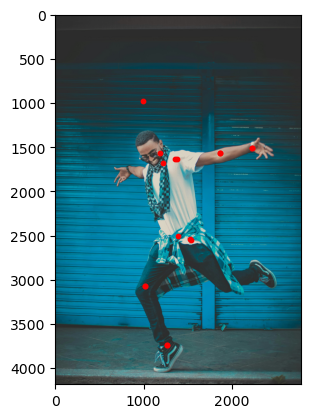

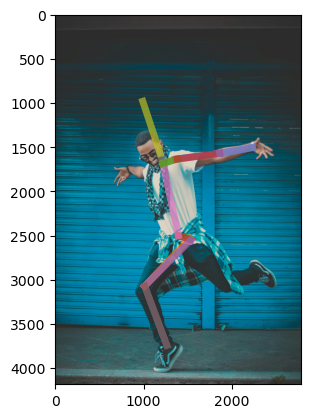

In [45]:
import os

test_image = os.path.join(PROJECT_PATH, 'test_image.jpg')

image, keypoints = predict(model, test_image)
draw_keypoints_on_image(image, keypoints)
draw_skeleton_on_image(image, keypoints)

output_path = "model-epoch-2-loss-1.2050.pt"의 모델로 한 결과다.
    
다른 모델을 사용하면 어떨까? 이미 학습되어 있는 모델이 있는 거 같던데? 

In [48]:
import torch
import numpy as np
import PIL
import ray
'''
내가 1에폭만 돌린 학습 결과를 써먹어 보자 아마도 최악의 결과가 나오겠지만 비교는 해볼 수 있다.
'''
# output_path = "model-epoch-1-loss-10.5207.pt"


# 이전의 학습하는 코드 블럭을 통해 학습하고 그 모델을 사용할 경우 아래 주석 처리된 코드를 사용하면 됩니다
WEIGHTS_PATH = os.path.join(PROJECT_PATH, 'models', 'model-epoch-1-loss-10.5207.pt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU/CPU 설정
model = StackedHourglassNetwork(IMAGE_SHAPE, num_stack=4, num_residual=1, num_heatmap=num_heatmap)    # 모델 초기화
model.to(device)  #모델을 GPU/CPU로 이동
checkpoint = torch.load(WEIGHTS_PATH, map_location=device)# 저장된 체크포인트 로드
model.load_state_dict(checkpoint) # 모델에 가중치 로드
model.eval() # 평가 모드로 변경

StackedHourglassNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (bottleneck1): BottleneckBlock(
    (downsample_conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bottleneck2

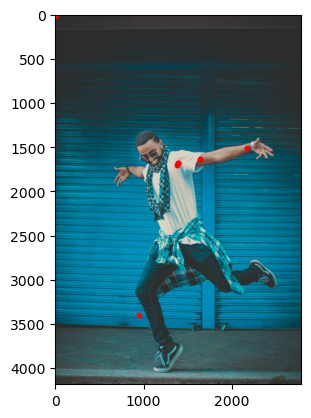

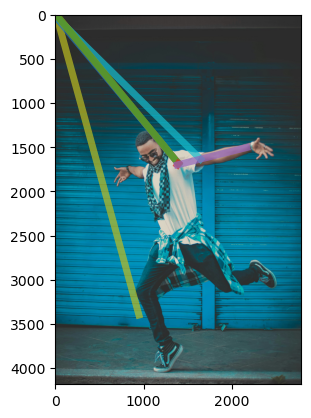

In [49]:
import os

test_image = os.path.join(PROJECT_PATH, 'test_image.jpg')

image, keypoints = predict(model, test_image)
draw_keypoints_on_image(image, keypoints)
draw_skeleton_on_image(image, keypoints)

아주 엉망인것을 알 수 있다. 그렇다면 출처를 알 수 없는 다른 모델은 사용 가능 할까? 확장자가 .h5인 것이 안될 것 같기는 한데

# 다른 모델을 찾아서 확인해 보자



In [1]:
! git clone https://github.com/microsoft/human-pose-estimation.pytorch && cd human-pose-estimation.pytorch && git checkout 18f1d0fa5b5db7fe08de640610f3fdbdbed8fb2f

Cloning into 'human-pose-estimation.pytorch'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 197 (delta 1), reused 7 (delta 0), pack-reused 188 (from 1)
Receiving objects: 100% (197/197), 73.71 KiB | 1.04 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Note: switching to '18f1d0fa5b5db7fe08de640610f3fdbdbed8fb2f'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 18f1d0f Update README.md


In [2]:
! pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 75.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [onnxruntime] [onnxruntime]y]


In [17]:
import sys
if "/human-pose-estimation.pytorch/lib/" not in sys.path:
    sys.path.insert(0, "/human-pose-estimation.pytorch/lib/")

In [12]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim
import torchvision.transforms as T

import cv2

import re
import os
import copy
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [19]:
!pip install easydict

In [20]:
import models
# sys.path.append(os.path.abspath("/human-pose-estimation.pytorch/lib/"))
from core.config import config
from core.config import update_config
from core.config import update_dir
from core.config import get_model_name

In [21]:
! gdown https://drive.google.com/uc?id=1V2AaVpDSn-eS7jrFScHLJ-wvTFuQ0-Dc

Downloading...
From (original): https://drive.google.com/uc?id=1V2AaVpDSn-eS7jrFScHLJ-wvTFuQ0-Dc
From (redirected): https://drive.google.com/uc?id=1V2AaVpDSn-eS7jrFScHLJ-wvTFuQ0-Dc&confirm=t&uuid=f7c86427-06d1-43b4-9aad-e66478695573
To: /home/jovyan/work/mpii/pose_resnet_50_256x256.pth.tar
100%|████████████████████████████████████████| 136M/136M [00:02<00:00, 53.2MB/s]


In [31]:
CONFIG_FILE = '~/human-pose-estimation.pytorch/experiments/mpii/resnet50/256x256_d256x3_adam_lr1e-3.yaml'

MODEL_PATH = '/content/pose_resnet_50_256x256.pth.tar'

In [32]:
update_config(CONFIG_FILE)
config.GPUS = '' # we are running on CPU

FileNotFoundError: [Errno 2] No such file or directory: '~/human-pose-estimation.pytorch/experiments/mpii/resnet50/256x256_d256x3_adam_lr1e-3.yaml'

# 프로젝트: 모델 바꿔보기

In [68]:
import torch
import numpy as np
import PIL
import ray

print(torch.__version__)
print(np.__version__)
print(PIL.__version__)
print(ray.__version__)

2.7.1+cu118
2.2.6
11.2.1
2.49.1


## simplebaseline 모델로 변경해 봅시다

### STEP 1 : simplebaseline 모델 완성하기
simplebaseline.py 파일과 이전에 살펴본 Simplebaseline 내용을 참고하여 모델을 완성합니다.

In [34]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 35.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20/20 [tensorflow]0 [tensorflow]]]ata-server]


In [35]:
import tensorflow as tf

# 1. Backbone 모델 (ResNet50) 정의
# pre-trained ImageNet 가중치를 사용하며, 마지막 fully-connected layer는 제외합니다.
resnet = tf.keras.applications.resnet.ResNet50(include_top=False, weights='imagenet')

# 2. Deconvolution 레이어 생성 함수
# num_deconv_layers 만큼 Conv2DTranspose, BatchNormalization, ReLU 레이어를 쌓습니다.
def _make_deconv_layer(num_deconv_layers):
    seq_model = tf.keras.models.Sequential()
    for i in range(num_deconv_layers):
        # Conv2DTranspose를 통해 feature map의 해상도를 2배씩 높입니다.
        seq_model.add(tf.keras.layers.Conv2DTranspose(256, kernel_size=(4, 4), strides=(2, 2), padding='same'))
        seq_model.add(tf.keras.layers.BatchNormalization())
        seq_model.add(tf.keras.layers.ReLU())
    return seq_model

# 3개의 deconvolution layer를 생성합니다.
upconv = _make_deconv_layer(3)

# 3. 최종 히트맵 생성 레이어
# 1x1 Convolution을 통해 16개 채널(관절 개수)을 가진 히트맵을 생성합니다.
final_layer = tf.keras.layers.Conv2D(16, kernel_size=(1, 1), padding='same')


# 4. Simplebaseline 모델 전체 정의
def Simplebaseline(input_shape=(256, 256, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    # ResNet backbone -> Deconv layers -> Final layer 순서로 모델을 구성합니다.
    x = resnet(inputs)
    x = upconv(x)
    out = final_layer(x)

    model = tf.keras.Model(inputs, out, name='simple_baseline')
    return model

2025-09-17 14:38:31.211499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-17 14:38:33.102314: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
W0000 00:00:1758119914.007216    1059 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


  한 가지 중요한 점은, 이전에 작성한 simplebaseline.py는 TensorFlow 코드이고 현재 노트북의 학습 환경(Trainer, Preprocessor 등)은 PyTorch로 구현되어
  있다는 것입니다. 따라서 두 프레임워크가 달라 직접 교체할 수는 없습니다.

  이 문제를 해결하기 위해, `Simplebaseline` 모델을 PyTorch 코드로 재작성하여 기존 학습 환경과 호환되도록 만들겠습니다.


  1단계: PyTorch로 Simplebaseline 모델 정의하기
  아래 코드를 노트북의 새 셀에 추가하여 PyTorch 버전의 Simplebaseline 모델을 정의하세요.

In [69]:
import torch
import torch.nn as nn
import torchvision.models as models

class SimpleBaseline(nn.Module):
  def __init__(self, num_heatmap):
      super(SimpleBaseline, self).__init__()

      # Pre-trained ResNet50 모델 로드
      resnet = models.resnet50(pretrained=True)

      # Backbone: ResNet50의 마지막 avgpool과 fc layer를 제외
      self.backbone = nn.Sequential(*list(resnet.children())[:-2])

      # Deconvolution 레이어
      self.deconv_layers = self._make_deconv_layer(3)

      # 최종 Heatmap 생성 레이어
      self.final_layer = nn.Conv2d(
          in_channels=256,
          out_channels=num_heatmap,
          kernel_size=1,
          stride=1,
          padding=0
      )

  def _make_deconv_layer(self, num_layers):
      layers = []
      # ResNet50의 출력 채널 수는 2048
      in_channels = 2048
      out_channels = 256

      for i in range(num_layers):
          layers.append(
              nn.ConvTranspose2d(
                  in_channels=in_channels,
                  out_channels=out_channels,
                  kernel_size=4,
                  stride=2,
                  padding=1,
                  output_padding=0,
                  bias=False
              )
          )
          layers.append(nn.BatchNorm2d(out_channels))
          layers.append(nn.ReLU(inplace=True))
          in_channels = out_channels

      return nn.Sequential(*layers)

  def forward(self, x):
      x = self.backbone(x)
      x = self.deconv_layers(x)
      x = self.final_layer(x)
      # Trainer가 list 형태의 출력을 기대하므로 list에 담아 반환
      return [x]

print('슝=3 PyTorch SimpleBaseline 모델이 정의되었습니다.')

슝=3 PyTorch SimpleBaseline 모델이 정의되었습니다.


### STEP 2 : simplebaseline 모델로 변경하여 훈련하기
StackedHourglass를 학습시킨 코드의 모델 선언 부분을 simplebaseline 모델로 변경한 후 다시 학습을 진행합니다.

In [70]:
  def train_simplebaseline(epochs, learning_rate, num_heatmap, batch_size, train_annotation_file, val_annotation_file, image_dir):
      """
      Simplebaseline 모델로 학습을 진행하는 함수
      """
      global_batch_size = batch_size

      train_loader = create_dataloader(train_annotation_file, image_dir, batch_size, num_heatmap, is_train=True)
      val_loader = create_dataloader(val_annotation_file, image_dir, batch_size, num_heatmap, is_train=False)

      if not os.path.exists(MODEL_PATH):
          os.makedirs(MODEL_PATH)

      # 모델 선언 부분을 SimpleBaseline으로 변경
      model = SimpleBaseline(num_heatmap=num_heatmap)

      device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      model.to(device)

      trainer = Trainer(
          model,
          epochs,
          global_batch_size,
          initial_learning_rate=learning_rate
      )

      print("Start training SimpleBaseline model...")
      return trainer.run(train_loader, val_loader, device)

  print('슝=3 SimpleBaseline 학습 함수가 준비되었습니다.')

슝=3 SimpleBaseline 학습 함수가 준비되었습니다.


In [71]:

TRAIN_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'train.json')
VAL_JSON = os.path.join(PROJECT_PATH, 'mpii_human_pose_v1_u12_2', 'validation.json')
IMAGE_DIR = os.path.join(PROJECT_PATH, 'images')

# Simplebaseline 모델 학습 실행
best_model_path = train_simplebaseline(
  epochs=1,
  learning_rate=0.0007,
  num_heatmap=16,
  batch_size=16,
  train_annotation_file=TRAIN_JSON,
  val_annotation_file=VALID_JSON,
  image_dir=IMAGE_PATH
)

print(f"Training finished. Best model saved at: {best_model_path}")

/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


단일 GPU 혹은 CPU 사용
Start training SimpleBaseline model...
Start epoch 1 with learning rate 0.000700
[Train] batch 1 loss 0.5737 avg_loss 0.5737
[Train] batch 2 loss 0.5261 avg_loss 0.5499
[Train] batch 3 loss 0.4865 avg_loss 0.5288
[Train] batch 4 loss 0.4698 avg_loss 0.5140
[Train] batch 5 loss 0.4533 avg_loss 0.5019
[Train] batch 6 loss 0.4399 avg_loss 0.4915
[Train] batch 7 loss 0.4262 avg_loss 0.4822
[Train] batch 8 loss 0.4518 avg_loss 0.4784
[Train] batch 9 loss 0.4464 avg_loss 0.4749
[Train] batch 10 loss 0.4223 avg_loss 0.4696
[Train] batch 11 loss 0.4287 avg_loss 0.4659
[Train] batch 12 loss 0.4148 avg_loss 0.4616
[Train] batch 13 loss 0.4069 avg_loss 0.4574
[Train] batch 14 loss 0.4208 avg_loss 0.4548
[Train] batch 15 loss 0.4090 avg_loss 0.4517
[Train] batch 16 loss 0.4146 avg_loss 0.4494
[Train] batch 17 loss 0.4217 avg_loss 0.4478
[Train] batch 18 loss 0.4308 avg_loss 0.4468
[Train] batch 19 loss 0.4117 avg_loss 0.4450
[Train] batch 20 loss 0.4121 avg_loss 0.4434
[Train] bat

### STEP 3 : 두 모델의 비교
실습에서 다룬 StackedHourglass Network와 Simplebaseline 모델을 둘 다 동일한 Epoch 수만큼 학습하여 그 결과를 비교해 봅니다.

NameError: name 'hourglass_history' is not defined

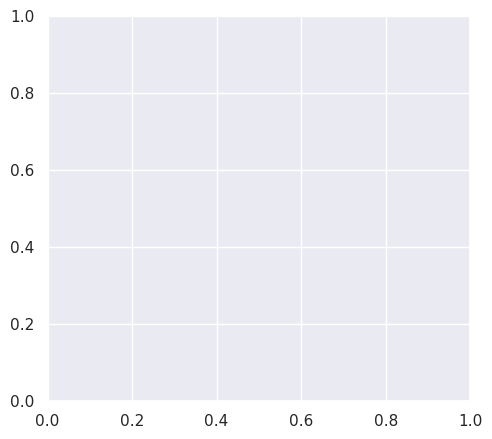

In [72]:
import matplotlib.pyplot as plt

epochs_range = range(1, 11) # 10 epochs

plt.figure(figsize=(12, 5))

# Train Loss 비교
plt.subplot(1, 2, 1)
plt.plot(epochs_range, hourglass_history['train_loss'], 'r-', label='Hourglass Train Loss')
plt.plot(epochs_range, simplebaseline_history['train_loss'], 'b-', label='SimpleBaseline Train Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation Loss 비교
plt.subplot(1, 2, 2)
plt.plot(epochs_range, hourglass_history['val_loss'], 'r--', label='Hourglass Val Loss')
plt.plot(epochs_range, simplebaseline_history['val_loss'], 'b--', label='SimpleBaseline Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Pose Estimation 결과 시각화 (정성적 비교)
- 학습 진행 경과 (loss 감소 현황)

가급적 두 모델 모두 최소 3epoch 이상, (5epoch 이상 권장)을 학습하기 바랍니다.

학습목표
tfrecord를 활용한 데이터셋 구성과 전처리를 통해 프로젝트 베이스라인 구성을 확인하였다.
 - MPII 데이터셋을 기반으로 1epoch에 30분 이내에 학습가능한 베이스라인을 구축하였다.

simplebaseline 모델을 정상적으로 구현하였다.
 - simplebaseline 모델을 구현하여 실습코드의 모델을 대체하여 정상적으로 학습이 진행되었다.

Hourglass 모델과 simplebaseline 모델을 비교분석한 결과를 체계적으로 정리하였다.
 - 두 모델의 pose estimation 테스트결과 이미지 및 학습진행상황 등을 체계적으로 비교분석하였다.

# 회고
왜 내가 돌리면 메모리가 100을 차지하는지 아직 분석을 못했다. 이 때문에 2epoch 이상의 학습을 돌릴 수가 없었다.
또한 다른 모델을 불러와서 활용해 보려고 했지만 이또한 완성하지 못했다. 망했으요;;;